In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression

## 1. Read & understand the data

In [2]:
advertising = pd.read_csv("data/advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:xlabel='TV', ylabel='Sales'>

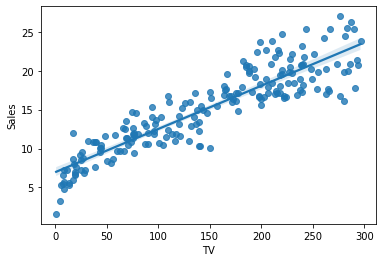

In [6]:
sns.regplot(x='TV', y='Sales', data=advertising)

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

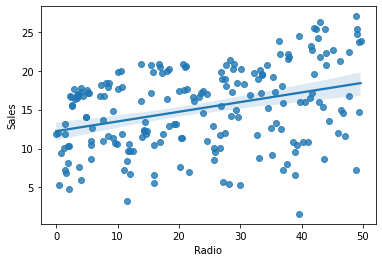

In [7]:
sns.regplot(x='Radio', y='Sales', data=advertising)

<AxesSubplot:xlabel='Radio', ylabel='Newspaper'>

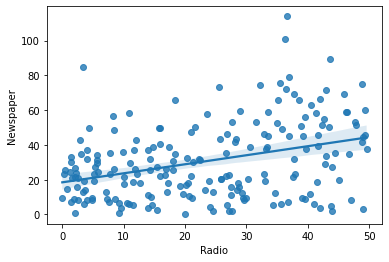

In [8]:
sns.regplot(x='Radio', y='Newspaper', data=advertising)

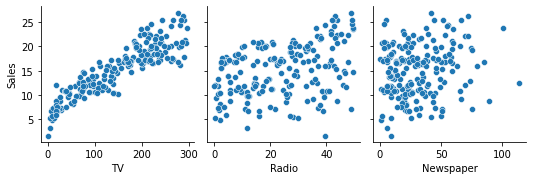

In [9]:
sns.pairplot(data=advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')

<AxesSubplot:>

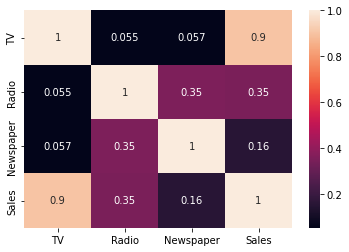

In [10]:
sns.heatmap(advertising.corr(), annot=True)

# Linear Regression using statsmodel

## 2. Train the model

In [11]:
# Create X, y
X = advertising['TV']
y = advertising['Sales']

# Split into training and test sets
X_train, X_test, y_train, y_test =  train_test_split(X,y,train_size=0.70,random_state=100)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140,) (60,) (140,) (60,)


In [12]:
import statsmodels.api as sm

In [13]:
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

/Users/sreedevigattu/sree/PGDS/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [14]:
# Ordinary Least Squares
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [15]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           1.52e-52
Time:                        11:47:27   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

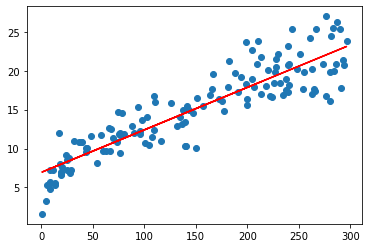

In [16]:
#y_train_pred = 6.9487 +  0.054 * X_train
y_train_pred = lr_model.predict(X_train_sm)

plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')

## 3. Residual analysis

In [29]:
print(y_train[:5])
print(y_train_pred[:5])

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64
[18.58874687 15.21236477 18.13056255 14.74327129 14.27417782]


In [17]:
res = y_train - y_train_pred
res

74    -1.588747
3      1.287635
185    4.469437
26     0.256729
90    -0.274178
         ...   
87     3.013102
103    2.502170
67    -1.146907
24    -0.646884
8     -2.617777
Length: 140, dtype: float64

Text(0.5, 1.0, 'Residuals')

<Figure size 432x288 with 0 Axes>

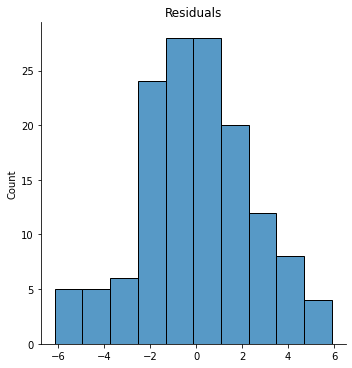

In [18]:
plt.figure()
sns.displot(res)
plt.title("Residuals")

The residuals are normally distributed

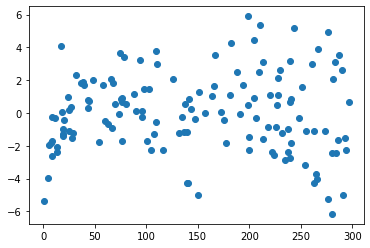

In [19]:
# residual plot
plt.scatter(X_train, res)

there are no visual patterns in the residuals. So the model fit is good.

## 4. Test and evaluate on test data

In [20]:
# Predit
X_test_sm = sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred[:5]

/Users/sreedevigattu/sree/PGDS/MachineLearning/venv/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [21]:
# Evaluate
r2_test = r2_score(y_true=y_test, y_pred=y_test_pred)
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
print("r2_train:", r2_train, "r2_test:", r2_test)

r2_train: 0.8157933136480389 r2_test: 0.792103160124566


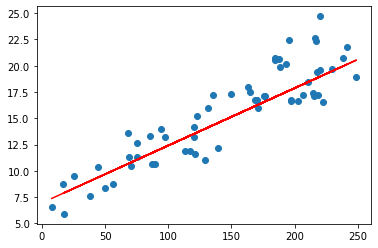

In [22]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')

# Linear Regression using sklearn

In [23]:
print(X_train.shape, X_test.shape)
X_train_lm = X_train.values.reshape(-1, 1)
X_test_lm = X_test.values.reshape(-1, 1)
print(X_train_lm.shape, X_test_lm.shape)

(140,) (60,)
(140, 1) (60, 1)


In [24]:
lm = LinearRegression()
lm.fit(X_train_lm, y_train)

LinearRegression()

In [25]:
print("coef_", lm.coef_, "intercept_", lm.intercept_)

coef_ [0.05454575] intercept_ 6.948683200001357


In [26]:
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [27]:
r2_train = r2_score(y_true=y_train, y_pred=y_train_pred)
r2_test = r2_score(y_true=y_test, y_pred=y_test_pred)
print("r2_train:", r2_train, "r2_test:", r2_test)

r2_train: 0.8157933136480389 r2_test: 0.7921031601245662
